In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 

In [10]:
recovery_rate = 0.1  # recovery rate in case of default in fraction

In [11]:
# Getting the data
root_path = os.getcwd()
data_path = os.path.join(root_path, 'loan_data.csv')

data = pd.read_csv(data_path)

# Initial data inspections


In [12]:
data.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


There are no null values, which is good.

In [14]:
data.describe()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.974577e+06,1.461200,4159.677034,8718.916797,70039.901401,4.552800,637.557700,0.185100
std,2.293890e+06,1.743846,1421.399078,6627.164762,20072.214143,1.566862,60.657906,0.388398
min,1.000324e+06,0.000000,46.783973,31.652732,1000.000000,0.000000,408.000000,0.000000
25%,2.977661e+06,0.000000,3154.235371,4199.836020,56539.867903,3.000000,597.000000,0.000000
50%,4.989502e+06,1.000000,4052.377228,6732.407217,70085.826330,5.000000,638.000000,0.000000
75%,6.967210e+06,2.000000,5052.898103,11272.263740,83429.166133,6.000000,679.000000,0.000000
max,8.999789e+06,5.000000,10750.677810,43688.784100,148412.180500,10.000000,850.000000,1.000000


To quickly see the correlation between elements, we can use a correlation heatmap.  

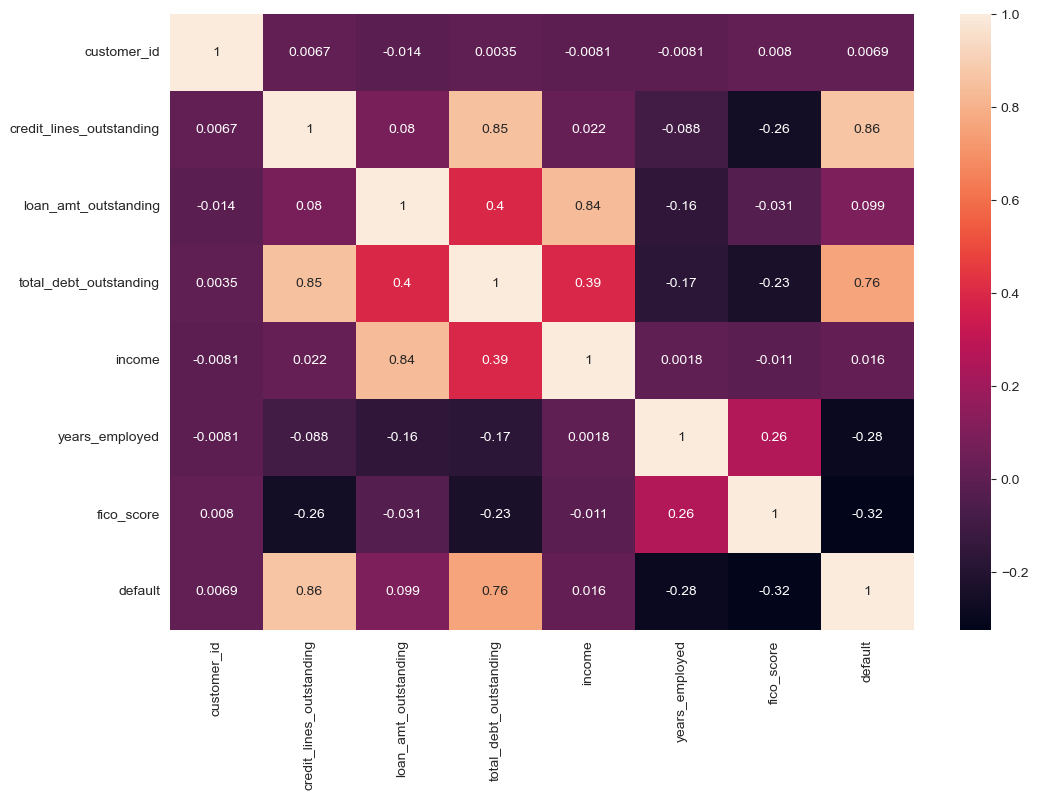

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True)
plt.gca()
plt.show()

There is a high correlation between the loan amount and income, so to reduce collinearity, we can drop one of them. Customer_ID is not useful either. We can drop loan_amt_outstanding, since this has a very weak correlation with the default.

In [16]:
data.drop(['income', 'customer_id', 'loan_amt_outstanding'], axis=1, inplace=True)

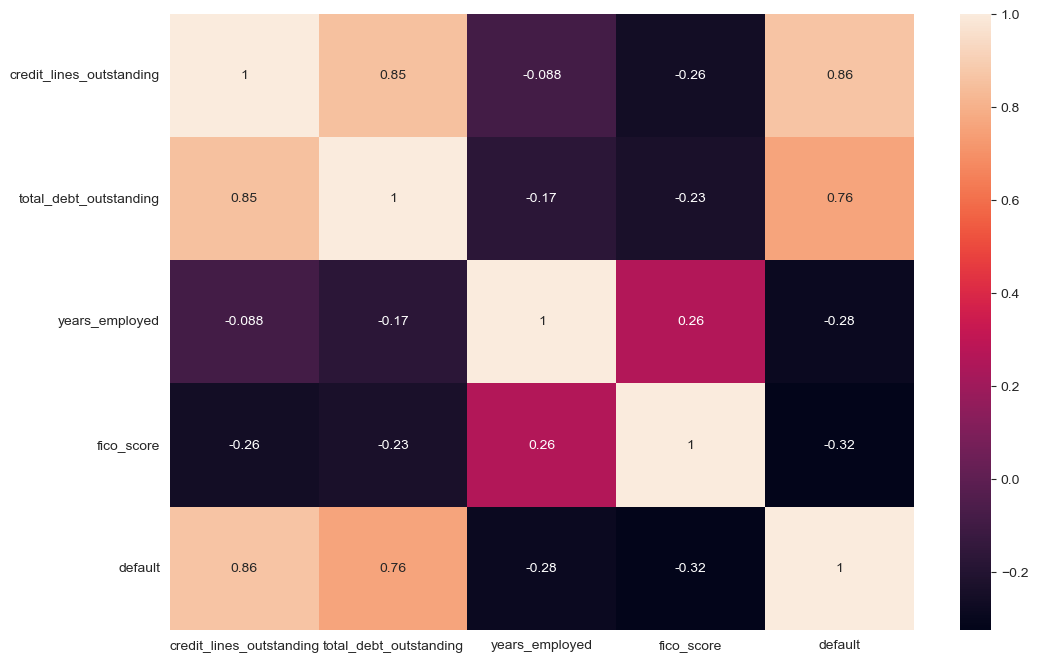

In [17]:
# Viewing once more
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True)
plt.gca()
plt.show()

In [18]:
data.head()

,credit_lines_outstanding,total_debt_outstanding,years_employed,fico_score,default
0,0,3915.471226,5,605,0
1,5,8228.752520,2,572,1
2,0,2027.830850,4,602,0
3,0,2501.730397,5,612,0
4,1,1768.826187,6,631,0


In [19]:
# Number of defaults in this sample of size 10000
data['default'].value_counts()

default
0    8149
1    1851
Name: count, dtype: int64

<Figure size 600x300 with 0 Axes>

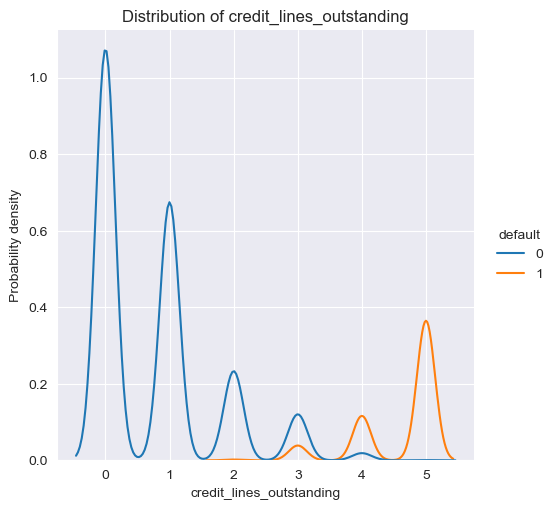

<Figure size 600x300 with 0 Axes>

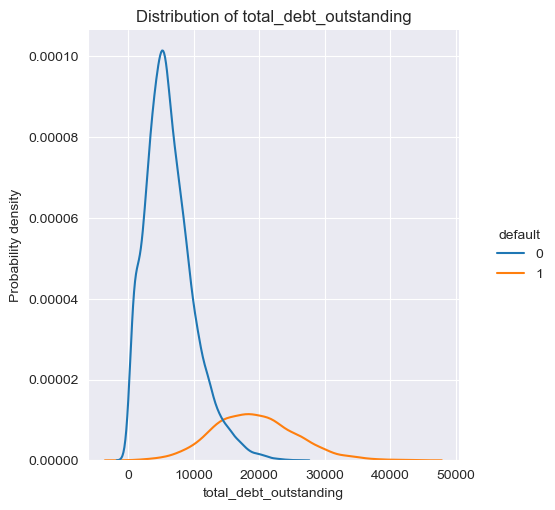

<Figure size 600x300 with 0 Axes>

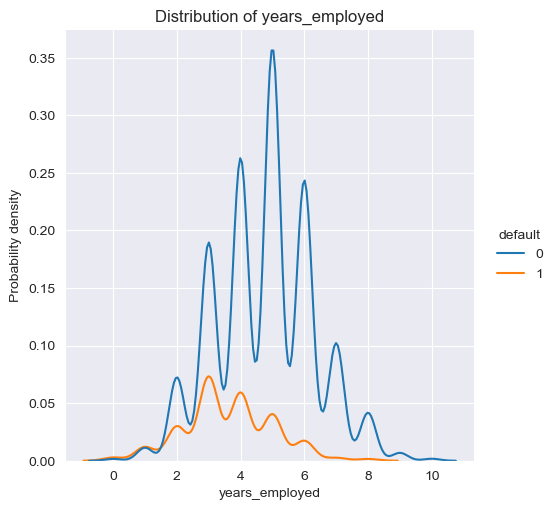

<Figure size 600x300 with 0 Axes>

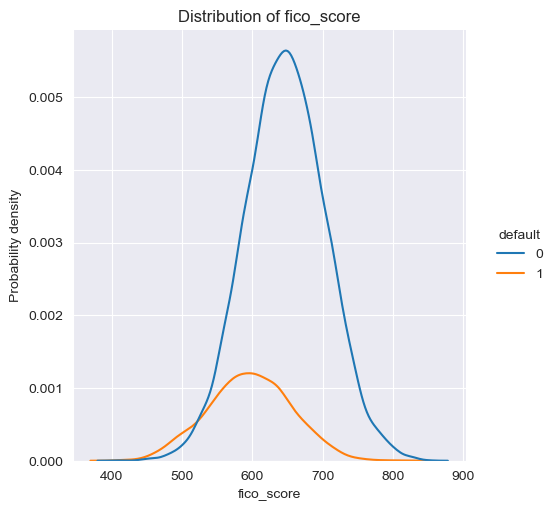

In [20]:
# Visualising the distribution of the data
for header in data.columns.drop('default'):
    plt.figure(figsize=(6, 3))
    sns.displot(data, x=header, hue='default', kind='kde')
    plt.title("Distribution of " + header)
    plt.xlabel(header)
    plt.ylabel('Probability density')
    plt.gca()
    plt.show()

In [21]:
# Train and test split of the data
X = data.drop('default', axis=1)
y = data['default']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Simple logistic regression model

In [23]:
lr = LogisticRegression()  # initialising the model
lr.fit(X_train, y_train)  # fit to training data

LogisticRegression()

In [24]:
predicted_probs = lr.predict_proba(X_test)  # predict on test data
predicted_default = lr.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, log_loss, classification_report

In [26]:
cm = confusion_matrix(y_test, predicted_default)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['No default', 'Default'])

<Axes: xlabel='Predicted', ylabel='Actual'>

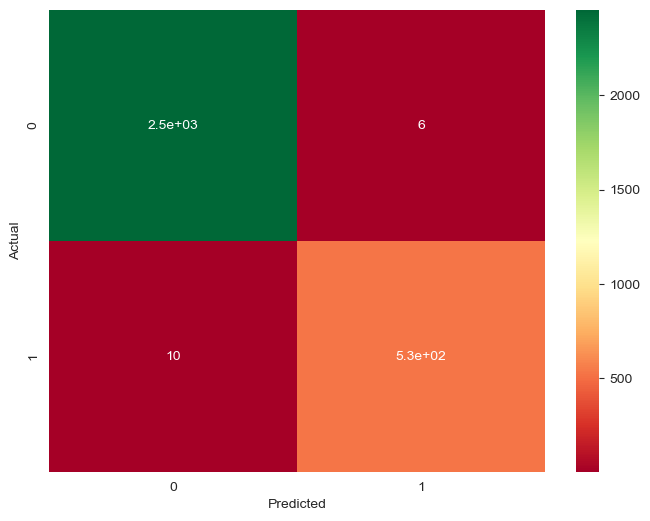

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="RdYlGn")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.gca()

In [28]:
# Classification accuracy metrics
print(classification_report(y_test, predicted_default))
print("Log loss: ", log_loss(y_test, predicted_probs))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2459
           1       0.99      0.98      0.99       541

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000

Log loss:  0.013561350247765148


The logistic regression model is clearly very strong, as the f1-score is near perfect and its log loss is very low. We shall see if we can improve upon this log loss with a random forest classifier.

# Random forest classifier


In [29]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
predicted_probs_rf = rf.predict_proba(X_test)
predicted_default_rf = rf.predict(X_test)

In [31]:
# Confusion matrix for random forest
cm_rf = confusion_matrix(y_test, predicted_default_rf)
cm_display_rf = ConfusionMatrixDisplay(cm_rf, display_labels=['No default', 'Default'])

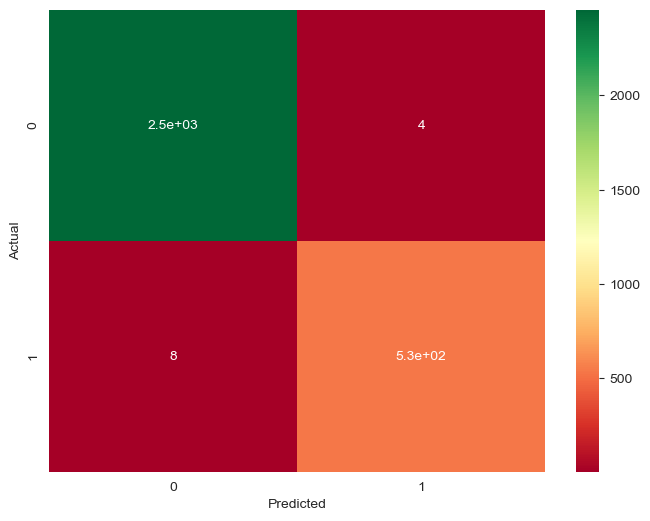

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, cmap="RdYlGn")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.gca()
plt.show()

In [33]:
# Classification accuracy metrics for random forest
print(classification_report(y_test, predicted_default_rf))
print("Log loss: ", log_loss(y_test, predicted_probs_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2459
           1       0.99      0.99      0.99       541

    accuracy                           1.00      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       1.00      1.00      1.00      3000

Log loss:  0.014953325916288345


Now this is very slightly worse, but consider that we have not done any thorough cross-validation or hyperparameter tuning. This is just a simple model. We can conclude it is on par with the logistic regression model. We can try to optimise a kin of model with AutoML

In [34]:
from flaml import AutoML

In [35]:
# Initialising an AutoML instance
auto_model = AutoML()

# Optimisation constraint
auto_model_settings = {
    "estimator_list": ["lgbm", "rf"],
    "time_budget": 20,  # in seconds
    "metric": "log_loss",
    "task": "classification",
    "log_file_name": "autoML.log",
}
# Fitting the model
auto_model.fit(X_train, y_train, **auto_model_settings)

# Predict
auto_preds = auto_model.predict_proba(X_train)

# Best model
best_model = auto_model.model.estimator

[flaml.automl.logger: 08-12 09:23:32] {1680} INFO - task = classification
[flaml.automl.logger: 08-12 09:23:32] {1691} INFO - Evaluation method: cv
[flaml.automl.logger: 08-12 09:23:32] {1789} INFO - Minimizing error metric: log_loss
[flaml.automl.logger: 08-12 09:23:32] {1901} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf']
[flaml.automl.logger: 08-12 09:23:32] {2219} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 08-12 09:23:32] {2345} INFO - Estimated sufficient time budget=3091s. Estimated necessary time budget=3s.
[flaml.automl.logger: 08-12 09:23:32] {2392} INFO -  at 0.4s,	estimator lgbm's best error=0.2608,	best estimator lgbm's best error=0.2608
[flaml.automl.logger: 08-12 09:23:32] {2219} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 08-12 09:23:33] {2392} INFO -  at 0.6s,	estimator lgbm's best error=0.2608,	best estimator lgbm's best error=0.2608
[flaml.automl.logger: 08-12 09:23:33] {2219} INFO - iteration 2, current learner lgbm
[f

In [36]:
# Evaluating the best model
best_model_preds = best_model.predict(X_test)
best_model_probs = best_model.predict_proba(X_test)

In [37]:
# Confusion matrix and classification report, log loss
cm_auto = confusion_matrix(y_test, best_model_preds)
cm_display_auto = ConfusionMatrixDisplay(cm_auto, display_labels=['No default', 'Default'])

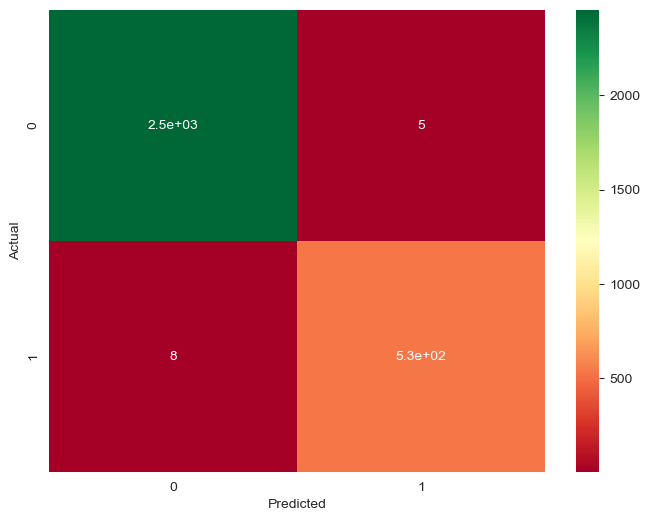

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2459
           1       0.99      0.99      0.99       541

    accuracy                           1.00      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       1.00      1.00      1.00      3000

Log loss:  0.012551578219980404


In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_auto, annot=True, cmap="RdYlGn")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.gca()
plt.show()

print(classification_report(y_test, best_model_preds))
print("Log loss: ", log_loss(y_test, best_model_probs))

# K-Fold cross validation

We can barely see any improvement in the log loss. We will now do k-fold cross validation to ensure that our model is robust.

In [39]:
from sklearn.model_selection import KFold
import numpy as np

def k_fold_validation(model, X, y, k=5, verbose=False):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    fold = 1
    log_losses = []
    
    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        y_pred_proba = model.predict_proba(X_val)
        if verbose:
            print(f"Fold {fold} Classification Report:")
            print(classification_report(y_val, y_pred))
        fold_log_loss = log_loss(y_val, y_pred_proba)
        log_losses.append(fold_log_loss)
        if verbose:
            print(f"Fold {fold} Log Loss: {fold_log_loss}\n")
        
        fold += 1
    
    return np.mean(log_losses)

# Example usage
lr_cv = LogisticRegression()
print(f"Logistic regression cross-validation performance: {k_fold_validation(lr, X, y, k=5)}")
print(f"Random forest cross-validation performance: {k_fold_validation(rf, X, y, k=5)}")
print(f"AutoML cross-validation performance: {k_fold_validation(best_model, X, y, k=5)}")

Logistic regression cross-validation performance: 0.012807477478580844
Random forest cross-validation performance: 0.02453798949285107
AutoML cross-validation performance: 0.15804539040803972


# The LGBMClassifier edges out by a margin in the cross-validation. We can begin to explore this model further.
We now define the final function to predict the risk of default for a given set of loan parameters.

In [40]:
def predict_default_probability(risk_model, loan_parameters):
    """
    Predicts the probability of default given a set of loan parameters.
    :param risk_model: could be random forests, logistic regression or LGBMClassifier
    :param loan_parameters: must be an np.array or correctly formatted dataframe
    :return: 
    """
    risk = risk_model.predict_proba(loan_parameters)
    loss = loan_parameters[0][1] * (1 - recovery_rate)  # expected loss in case of default
    print(f"Probability of default: {risk[0][1]*100:.4f}%")
    print(f"Potential loss: ${loss:.2f}")
    return risk, loss


In [64]:
# example usage
credit_lines_outstanding = 3
total_debt_outstanding = 20100
years_employed = 4
fico_score = 102
loan_parameters = np.array([credit_lines_outstanding, total_debt_outstanding, years_employed, fico_score]).reshape(1, -1)

In [65]:
default_probability = predict_default_probability(best_model, loan_parameters)

Probability of default: 12.5546%
Potential loss: $18090.00
